## Setup School Building Data for Study Area

Nofal, O. M., & van de Lindt, J. W. (2020). Minimal Building Flood Fragility and Loss Function Portfolio for Resilience Analysis at the Community Level. Water, 12(8), 2277.https://doi.org/10.3390/w12082277

Nofal, O. M., & van de Lindt, J. W. (2020). High-resolution approach to quantify the impact of building-level flood risk mitigation and adaptation measures on flood losses at the community-level. International Journal of Disaster Risk Reduction, 51, 101903. https://doi.org/10.1016/j.ijdrr.2020.101903

Nofal, O. M., & van de Lindt, J. W. (2020). Probabilistic flood loss assessment at the community scale: Case study of 2016 flooding in Lumberton, North Carolina. ASCE-ASME Journal of Risk and Uncertainty in Engineering Systems, Part A: Civil Engineering, 6(2), 05020001.

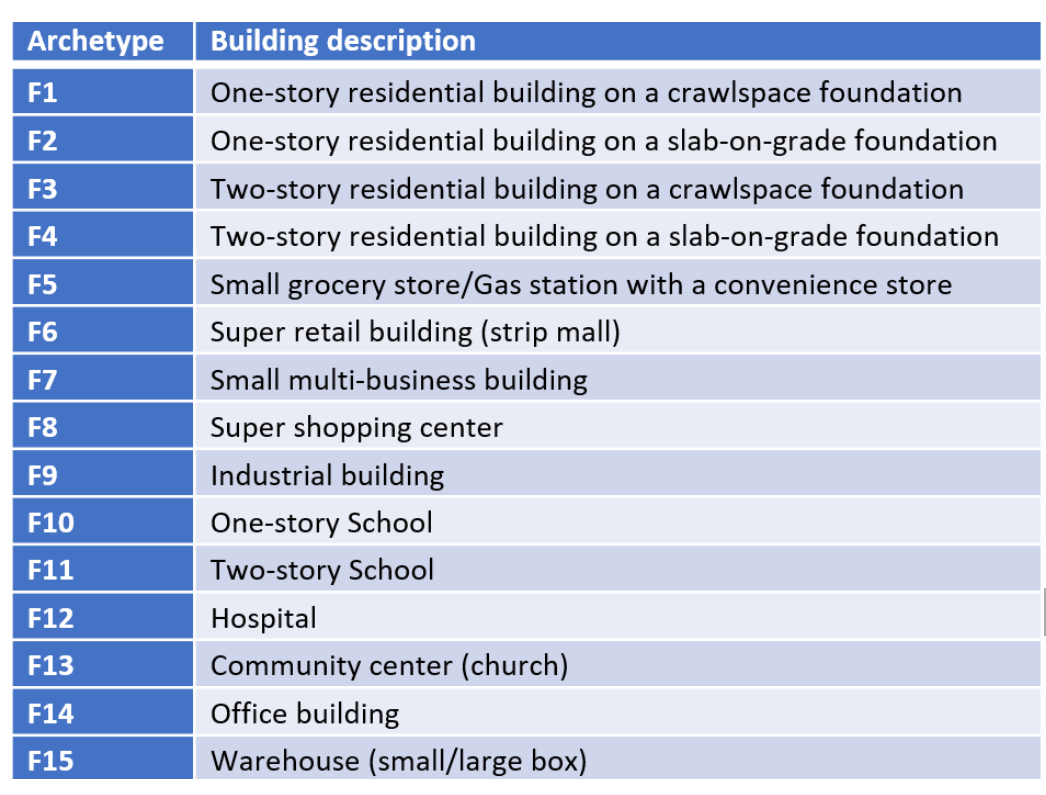

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math as math
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely
import descartes
import contextily as ctx # package for mapping shapefiles

import folium as fm # folium has more dynamic maps - but requires internet connection

import os # For saving output to path

In [2]:
# Display versions being used - important information for replication
import sys
print("Python Version     ", sys.version)
print("numpy version:     ", np.__version__)
print("geopandas version: ", gpd.__version__)
print("pandas version:    ", pd.__version__)
print("shapely version:   ", shapely.__version__)
# print("descartes version:   ", descartes.__version__)  1.1.0
print("folium version:    ", fm.__version__)

Python Version      3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
numpy version:      1.21.1
geopandas version:  0.9.0
pandas version:     1.3.1
shapely version:    1.7.1
folium version:     unknown


In [3]:
# Store Program Name for output files to have the same name
# Filename length issue - original filename and path exceeded Windows limit
programname = "IN-CORE_1gv1_SchoolBuildingData_2021-08-19"

# Save Outputfolder - due to long folder name paths output saved to folder with shorter name
# files from this program will be saved with the program name - this helps to follow the overall workflow
outputfolder = "workflow_output"
# Make directory to save output
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

# Setup access to IN-CORE
https://incore.ncsa.illinois.edu/

In [4]:
from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore_viz.geoutil import GeoUtil as viz

In [5]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
client.clear_cache()

Connection successful to IN-CORE services. pyIncore version detected: 0.9.6


In [6]:
# create data_service object for loading files
data_service = DataService(client)

## Read in Building Data with from IN-CORE DataService

In [7]:
# Lumberton, NC Building inventory
bldg_inv_id = "6036c2a9e379f22e1658d451" 
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\6036c2a9e379f22e1658d451\lumberton_building_inventory_w_strcid\lumberton_building_inventory_w_strcid.shp


In [8]:
bldg_inv_gdf = gpd.read_file(filename)
bldg_inv_gdf.crs = {'init': 'epsg:4326'}
bldg_inv_gdf.head()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210802\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,guid,strctid,ffe_elev,archetype,parid,struct_typ,no_stories,a_stories,b_stories,bsmt_type,...,dwell_unit,str_typ2,occ_typ2,appr_bldg,appr_land,appr_tot,year_built,lhsm_elev,g_elev,geometry
0,efd13166-d7a0-476b-ada5-c55cea1f0184,STefd13166-d7a0-476b-ada5-c55cea1f0184,41.41049,1,3715514603,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,40.2336,POINT (-79.08926 34.55354)
1,66352d95-70cb-46cb-8904-576f3ee3e9d3,ST66352d95-70cb-46cb-8904-576f3ee3e9d3,43.86419,2,3715516008,None,1,0,0,None,...,0,None,None,0,0,0,1985,0.0,42.9768,POINT (-79.08488 34.56072)
2,a4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,STa4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,40.84585,2,3715514607,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.9288,POINT (-79.08826 34.55475)
3,e433891c-aa7a-47b0-a6aa-1b0895a65908,STe433891c-aa7a-47b0-a6aa-1b0895a65908,40.90913,2,3715514606,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.9288,POINT (-79.08842 34.55446)
4,7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,ST7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,40.69086,1,3715514605,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.6240,POINT (-79.08862 34.55423)


In [9]:
bldg_inv_gdf['guid'].describe()

count                                    20091
unique                                   20091
top       efd13166-d7a0-476b-ada5-c55cea1f0184
freq                                         1
Name: guid, dtype: object

In [10]:
bldg_inv_gdf.columns

Index(['guid', 'strctid', 'ffe_elev', 'archetype', 'parid', 'struct_typ',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2', 'appr_bldg',
       'appr_land', 'appr_tot', 'year_built', 'lhsm_elev', 'g_elev',
       'geometry'],
      dtype='object')

In [11]:
# lok at Archtypes
#pd.crosstab(index=bldg_inv_gdf.archetype, columns="count")
bldg_inv_gdf.groupby(['archetype']).count()

,guid,strctid,ffe_elev,parid,struct_typ,no_stories,a_stories,b_stories,bsmt_type,sq_foot,...,dwell_unit,str_typ2,occ_typ2,appr_bldg,appr_land,appr_tot,year_built,lhsm_elev,g_elev,geometry
archetype,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,23,0,25,25,25,0,25,...,25,0,0,25,25,25,25,25,25,25
1,6070,6070,6070,6070,0,6070,6070,6070,0,6070,...,6070,0,0,6070,6070,6070,6070,6070,6070,6070
2,10273,10273,10273,10273,0,10273,10273,10273,0,10273,...,10273,0,0,10273,10273,10273,10273,10273,10273,10273
3,249,249,249,249,0,249,249,249,0,249,...,249,0,0,249,249,249,249,249,249,249
4,1391,1391,1391,1391,0,1391,1391,1391,0,1391,...,1391,0,0,1391,1391,1391,1391,1391,1391,1391
5,1060,1060,1060,1060,0,1060,1060,1060,0,1060,...,1060,0,0,1060,1060,1060,1060,1060,1060,1060
6,9,9,9,9,0,9,9,9,0,9,...,9,0,0,9,9,9,9,9,9,9
7,10,10,10,10,0,10,10,10,0,10,...,10,0,0,10,10,10,10,10,10,10
8,14,14,14,12,0,14,14,14,0,14,...,14,0,0,14,14,14,14,14,14,14


In [12]:
schoolbuildings_gdf = bldg_inv_gdf.loc[bldg_inv_gdf['archetype'].isin([10,11])]

In [13]:
schoolbuildings_gdf.head()

,guid,strctid,ffe_elev,archetype,parid,struct_typ,no_stories,a_stories,b_stories,bsmt_type,...,dwell_unit,str_typ2,occ_typ2,appr_bldg,appr_land,appr_tot,year_built,lhsm_elev,g_elev,geometry
2495,66b1392e-c7b0-4bd8-a092-a7ff0ea6c15a,ST66b1392e-c7b0-4bd8-a092-a7ff0ea6c15a,43.88056,10,3715519218,None,1,0,0,None,...,0,None,None,0,0,0,1978,0.0,43.2816,POINT (-79.12247 34.58987)
2496,31d34dad-4211-40d9-b4e3-38677b5ee72f,ST31d34dad-4211-40d9-b4e3-38677b5ee72f,43.86102,10,3715519217,None,1,0,0,None,...,0,None,None,0,0,0,1978,0.0,43.2816,POINT (-79.12254 34.59002)
2497,81370d16-d258-4dba-9405-f264534550c0,ST81370d16-d258-4dba-9405-f264534550c0,44.10298,10,3715519216,None,1,0,0,None,...,0,None,None,0,0,0,1978,0.0,43.2816,POINT (-79.12265 34.59022)
2498,f1d92274-c480-4658-b5af-723436a08af9,STf1d92274-c480-4658-b5af-723436a08af9,44.13976,10,3715519215,None,1,0,0,None,...,0,None,None,0,0,0,1978,0.0,43.2816,POINT (-79.12329 34.59078)
2499,942f44ec-e3a4-4e86-b5ee-79bb9a502d6e,ST942f44ec-e3a4-4e86-b5ee-79bb9a502d6e,44.22685,10,3715519214,None,1,0,0,None,...,0,None,None,0,0,0,1978,0.0,43.5864,POINT (-79.12334 34.59039)


In [14]:
schoolbuildings_gdf.groupby('archetype').aggregate(['count'])

,guid,strctid,ffe_elev,parid,struct_typ,no_stories,a_stories,b_stories,bsmt_type,sq_foot,...,dwell_unit,str_typ2,occ_typ2,appr_bldg,appr_land,appr_tot,year_built,lhsm_elev,g_elev,geometry
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
archetype,,,,,,,,,,,,,,,,,,,,,
10,84,84,84,84,0,84,84,84,0,84,...,84,0,0,84,84,84,84,84,84,84
11,4,4,4,4,0,4,4,4,0,4,...,4,0,0,4,4,4,4,4,4,4


Map of school buildings 10 = One Story [84], 11 = Two Story [4]


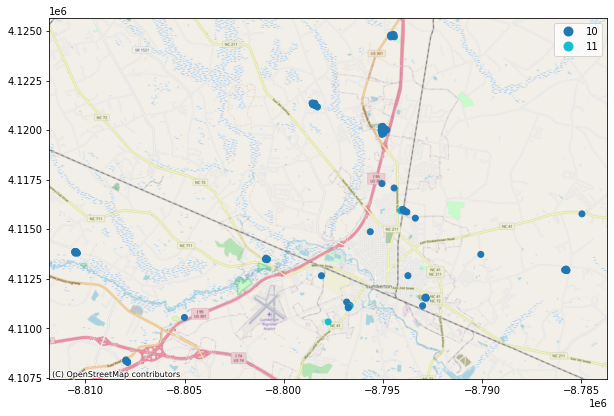

In [15]:
map = viz.plot_gdf_map(schoolbuildings_gdf,column='archetype', category=True)
print("Map of school buildings 10 = One Story [84], 11 = Two Story [4]")
map

In [16]:
# Save Work at this point as CSV
savefile = sys.path[0]+"/"+outputfolder+"/"+programname+".csv"
schoolbuildings_gdf.to_csv(savefile)